In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score, recall_score, precision_score, accuracy_score, f1_score, jaccard_score, plot_precision_recall_curve, plot_roc_curve






In [2]:
data = pd.read_csv('../input/churn-prediction/churn_.txt')
data.head()

,x1,x2,x3,x4,x5,x6,x7,churn
0,99,0,45.465291,16.358769,12.239092,2.440626,2,1
1,99,0,37.810000,15.790000,10.700000,3.240000,2,0
2,124,0,20.459244,13.607872,8.761792,2.756800,2,1
3,86,0,24.600787,14.907251,8.049048,2.478242,5,1
4,146,0,22.610000,22.340000,9.640000,3.020000,1,0


In [3]:
data.shape

(7256, 8)

In [4]:
data.isna().sum()

x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
churn    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7256 non-null   int64  
 1   x2      7256 non-null   int64  
 2   x3      7256 non-null   float64
 3   x4      7256 non-null   float64
 4   x5      7256 non-null   float64
 5   x6      7256 non-null   float64
 6   x7      7256 non-null   int64  
 7   churn   7256 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 453.6 KB


In [6]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,churn
count,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,100.765711,6.313671,32.594787,17.488511,9.124380,2.816711,1.716235,0.490077
std,39.715150,12.587163,10.334061,4.187507,2.147614,0.698790,1.455270,0.499936
min,1.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,24.960000,14.586988,7.688626,2.380000,1.000000,0.000000
50%,100.000000,0.000000,31.989410,17.547229,9.140000,2.830429,1.000000,0.000000
75%,126.000000,0.000000,40.511001,20.409678,10.570000,3.269711,3.000000,1.000000
max,243.000000,52.000000,59.760000,30.910000,17.770000,5.400000,9.000000,1.000000


## Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :7]
y = data.iloc[:, 7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1234)


print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')



The shape of X_train is: (4353, 7)
The shape of y_train is: (4353,)
The shape of X_test is: (2903, 7)
The shape of y_test is: (2903,)


# Model1: LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model1 = LinearDiscriminantAnalysis()
model1.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
y_pred_model1 = model1.predict(X_test)
confusion_matrix_model1 = confusion_matrix(y_pred_model1, y_test)
confusion_matrix_model1

array([[1020,  435],
       [ 428, 1020]])

Text(0.5, 1.0, 'Roc Curve')

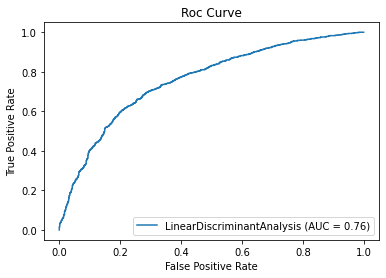

In [10]:
plot_roc_curve(model1, X_test, y_test)
plt.title('Roc Curve')

In [11]:
from scipy.stats import iqr

model_comp = pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model1), 
                           'Percision': precision_score(y_test, y_pred_model1), 
                           'Recall': recall_score(y_test, y_pred_model1), 
                           'F1_score': f1_score(y_test, y_pred_model1), 
                           'Jaccard_score': jaccard_score(y_test, y_pred_model1)}, index = ['Model1: LDA'])

model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.70442,0.701031,0.702721,0.541689


## Model2: QDA

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model2 = QuadraticDiscriminantAnalysis()
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)
confusion_matrix_model2 = confusion_matrix(y_pred_model2, y_test)
confusion_matrix_model2



array([[1075,  369],
       [ 373, 1086]])

Text(0.5, 1.0, 'Roc Curve')

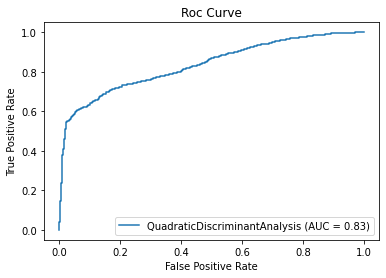

In [13]:
plot_roc_curve(model2, X_test, y_test)
plt.title('Roc Curve')

In [14]:
model_comp = model_comp.append(pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model2), 
                                             'Percision': precision_score(y_test, y_pred_model2), 
                                             'Recall': recall_score(y_test, y_pred_model2), 
                                             'F1_score': f1_score(y_test, y_pred_model2), 
                                             'Jaccard_score': jaccard_score(y_test, y_pred_model2)}, index = ['Model2: QDA']))
model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.704420,0.701031,0.702721,0.541689
Model2: QDA,0.744402,0.744345,0.746392,0.745367,0.594092


## Model3: Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)
confucsion_matrix_model3 = confusion_matrix(y_test, y_pred_model3)
confucsion_matrix_model3

array([[1078,  370],
       [ 426, 1029]])

Text(0.5, 1.0, 'Roc Curve')

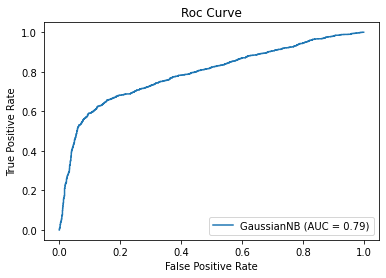

In [16]:
plot_roc_curve(model3, X_test, y_test)
plt.title('Roc Curve')

In [17]:
model_comp = model_comp.append(pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model3), 
                                             'Percision': precision_score(y_test, y_pred_model3), 
                                             'Recall': recall_score(y_test, y_pred_model3), 
                                             'F1_score': f1_score(y_test, y_pred_model3), 
                                             'Jaccard_score': jaccard_score(y_test, y_pred_model3)}, index = ['Model2: Naive Bayes']))
model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.704420,0.701031,0.702721,0.541689
Model2: QDA,0.744402,0.744345,0.746392,0.745367,0.594092
Model2: Naive Bayes,0.725801,0.735525,0.707216,0.721093,0.563836


## Model4: Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
confusion_matrix_model4 = confusion_matrix(y_test, y_pred_model4)
confusion_matrix_model4

array([[1024,  424],
       [ 438, 1017]])

Text(0.5, 1.0, 'Roc Curve')

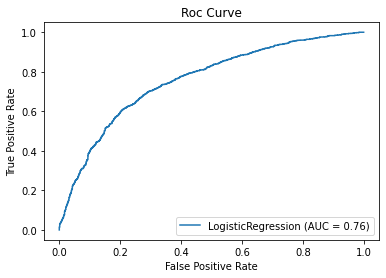

In [19]:
plot_roc_curve(model4, X_test, y_test)
plt.title('Roc Curve')

In [20]:
model_comp = model_comp.append(pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model4), 
                                             'Percision': precision_score(y_test, y_pred_model4), 
                                             'Recall': recall_score(y_test, y_pred_model4), 
                                             'F1_score': f1_score(y_test, y_pred_model4), 
                                             'Jaccard_score': jaccard_score(y_test, y_pred_model4)}, index = ['Model4: Logistic Regression']))
model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.704420,0.701031,0.702721,0.541689
Model2: QDA,0.744402,0.744345,0.746392,0.745367,0.594092
Model2: Naive Bayes,0.725801,0.735525,0.707216,0.721093,0.563836
Model4: Logistic Regression,0.703066,0.705760,0.698969,0.702348,0.541245


## Model5: KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model5.fit(X_train, y_train)
y_pred_model5 = model5.predict(X_test)
confusion_matrix_model5 = confusion_matrix(y_test, y_pred_model5)
confusion_matrix_model5

array([[1296,  152],
       [ 177, 1278]])

Text(0.5, 1.0, 'Roc Curve')

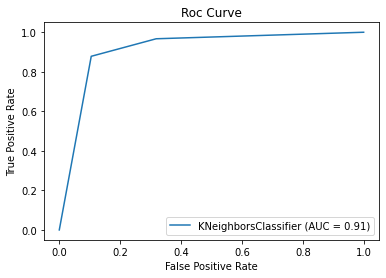

In [22]:
plot_roc_curve(model5, X_test, y_test)
plt.title('Roc Curve')

In [23]:
model_comp = model_comp.append(pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model5), 
                                             'Percision': precision_score(y_test, y_pred_model5), 
                                             'Recall': recall_score(y_test, y_pred_model5), 
                                             'F1_score': f1_score(y_test, y_pred_model5), 
                                             'Jaccard_score': jaccard_score(y_test, y_pred_model5)}, index = ['Model5: KNN Classifier']))
model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.704420,0.701031,0.702721,0.541689
Model2: QDA,0.744402,0.744345,0.746392,0.745367,0.594092
Model2: Naive Bayes,0.725801,0.735525,0.707216,0.721093,0.563836
Model4: Logistic Regression,0.703066,0.705760,0.698969,0.702348,0.541245
Model5: KNN Classifier,0.886669,0.893706,0.878351,0.885962,0.795271


## Model6: Decisoin Tree

In [24]:
{'min_samples_leaf': 2,
 'max_features': 6,
 'max_depth': 7,
 'criterion': 'entropy'}

{'min_samples_leaf': 2,
 'max_features': 6,
 'max_depth': 7,
 'criterion': 'entropy'}

In [25]:
from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier(max_depth = 7, 
                                max_features = 6,
                                criterion = 'entropy', 
                                min_samples_leaf = 2)
model6.fit(X_train, y_train)
y_pred_model6 = model6.predict(X_test)
confusion_matrix_model6 = confusion_matrix(y_pred_model6, y_test)
confusion_matrix_model6

array([[1332,  507],
       [ 116,  948]])

Text(0.5, 1.0, 'Roc Curve')

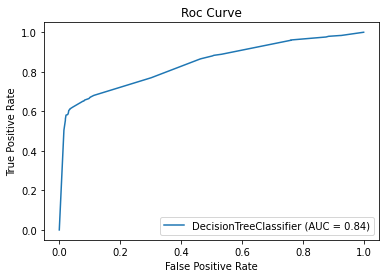

In [26]:
plot_roc_curve(model6, X_test, y_test)
plt.title('Roc Curve')

In [27]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth': [3, 4, 5, 6, 7, 8, 9,2], 
              'max_features': [2, 3, 4, 5, 6, 7], 
              'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 
              'criterion': ['gini', 'entropy']}

tree_cv = RandomizedSearchCV(model6, param_dist, cv = 5)

tree_cv.fit(X_train, y_train)
tree_cv.best_params_

{'min_samples_leaf': 3,
 'max_features': 7,
 'max_depth': 9,
 'criterion': 'entropy'}

In [28]:
model_comp = model_comp.append(pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model6), 
                                             'Percision': precision_score(y_test, y_pred_model6), 
                                             'Recall': recall_score(y_test, y_pred_model6), 
                                             'F1_score': f1_score(y_test, y_pred_model6), 
                                             'Jaccard_score': jaccard_score(y_test, y_pred_model6)}, index = ['Model6: Decision Tree Classifier']))
model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.704420,0.701031,0.702721,0.541689
Model2: QDA,0.744402,0.744345,0.746392,0.745367,0.594092
Model2: Naive Bayes,0.725801,0.735525,0.707216,0.721093,0.563836
Model4: Logistic Regression,0.703066,0.705760,0.698969,0.702348,0.541245
Model5: KNN Classifier,0.886669,0.893706,0.878351,0.885962,0.795271
Model6: Decision Tree Classifier,0.785394,0.890977,0.651546,0.752680,0.603437


## Model 7: Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier

model7 = BaggingClassifier()
model7.fit(X_train, y_train)
y_pred_model7 = model7.predict(X_test)
confusion_matrix_model7 = confusion_matrix(y_pred_model7, y_test)
confusion_matrix_model7

array([[1362,  307],
       [  86, 1148]])

Text(0.5, 1.0, 'Roc Curve')

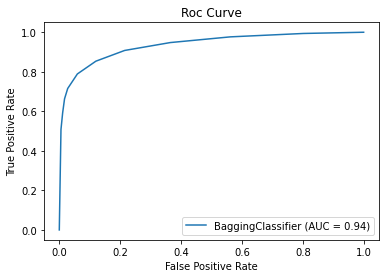

In [30]:
plot_roc_curve(model7, X_test, y_test)
plt.title('Roc Curve')

In [31]:
model_comp = model_comp.append(pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model7), 
                                             'Percision': precision_score(y_test, y_pred_model7), 
                                             'Recall': recall_score(y_test, y_pred_model7), 
                                             'F1_score': f1_score(y_test, y_pred_model7), 
                                             'Jaccard_score': jaccard_score(y_test, y_pred_model7)}, index = ['Model7: Bagging Classifier']))
model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.704420,0.701031,0.702721,0.541689
Model2: QDA,0.744402,0.744345,0.746392,0.745367,0.594092
Model2: Naive Bayes,0.725801,0.735525,0.707216,0.721093,0.563836
Model4: Logistic Regression,0.703066,0.705760,0.698969,0.702348,0.541245
Model5: KNN Classifier,0.886669,0.893706,0.878351,0.885962,0.795271
Model6: Decision Tree Classifier,0.785394,0.890977,0.651546,0.752680,0.603437
Model7: Bagging Classifier,0.864623,0.930308,0.789003,0.853849,0.744971


## Model8: Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
model8 = RandomForestClassifier()
model8.fit(X_train, y_train)
y_pred_model8 = model8.predict(X_test)
confusion_matrix_model8 = confusion_matrix(y_pred_model8, y_test)
confusion_matrix_model8

array([[1369,  257],
       [  79, 1198]])

Text(0.5, 1.0, 'Roc Curve')

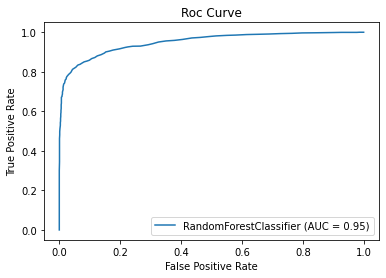

In [33]:
plot_roc_curve(model8, X_test, y_test)
plt.title('Roc Curve')

In [34]:
model_comp = model_comp.append(pd.DataFrame({'Accuracy': accuracy_score(y_test, y_pred_model8), 
                                             'Percision': precision_score(y_test, y_pred_model8), 
                                             'Recall': recall_score(y_test, y_pred_model8), 
                                             'F1_score': f1_score(y_test, y_pred_model8), 
                                             'Jaccard_score': jaccard_score(y_test, y_pred_model8)}, index = ['Model7: Random Forest Classifier']))
model_comp

,Accuracy,Percision,Recall,F1_score,Jaccard_score
Model1: LDA,0.702721,0.704420,0.701031,0.702721,0.541689
Model2: QDA,0.744402,0.744345,0.746392,0.745367,0.594092
Model2: Naive Bayes,0.725801,0.735525,0.707216,0.721093,0.563836
Model4: Logistic Regression,0.703066,0.705760,0.698969,0.702348,0.541245
Model5: KNN Classifier,0.886669,0.893706,0.878351,0.885962,0.795271
Model6: Decision Tree Classifier,0.785394,0.890977,0.651546,0.752680,0.603437
Model7: Bagging Classifier,0.864623,0.930308,0.789003,0.853849,0.744971
Model7: Random Forest Classifier,0.884258,0.938136,0.823368,0.877013,0.780965
